In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import configparser
sys.path.insert(0, 'Utils/')

from AISDataManager import AISDataManager
import SimpleUtils as sU
import Constants as c
import TimeUtils as timeUtils

aISDM = AISDataManager()

In [3]:
mMSITypeFile = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/MMSIListType_15_16_17_18_19.csv"
mMSITypeDF,_ = aISDM.load_data_from_csv(mMSITypeFile)
print(mMSITypeDF.shape)
print(mMSITypeDF.head)
totalVessels = mMSITypeDF.shape[0]

(6906, 2)
<bound method NDFrame.head of            MMSI  VesselType
0             1         0.0
1     338031982         0.0
2     338069687         0.0
3     355596000         0.0
4     365903144         0.0
5     366053000         0.0
6     211002010         0.0
7     367087370         0.0
8     367197000         0.0
9     367300280         0.0
10    368004240         0.0
11    218069000         0.0
12    368849000         0.0
13    503641900         0.0
14    368785000         0.0
15    101010101        22.0
16    367166820        30.0
17    367151530        30.0
18    368085340        30.0
19    366920620        30.0
20    366804620        30.0
21    366773410        30.0
22    367713520        30.0
23    367179710        30.0
24    369501000        30.0
25    338173607        30.0
26    338096421        30.0
27    338073267        30.0
28    868081180        30.0
29    338025236        30.0
...         ...         ...
6876  972608764         NaN
6877  972608808         NaN
6878  98

In [4]:
#remove vessels which has type as NaN
mMSITypeDF = mMSITypeDF.dropna()
print(mMSITypeDF.shape)
vesselWithType = mMSITypeDF.shape[0]
print("Vessels with type information = %d"%vesselWithType)

(5974, 2)
Vessels with type information = 5974


In [5]:
uniqueTypes = mMSITypeDF['VesselType'].unique()
totalNumTypes = uniqueTypes.shape[0]
print("There are total %d types of vessel"%totalNumTypes)

There are total 54 types of vessel


In [6]:
#get count for all the vessel types
vesselTypeOccurences = mMSITypeDF['VesselType'].value_counts(ascending=True)
print(vesselTypeOccurences.shape)
print(vesselTypeOccurences)

(54,)
69.0         1
22.0         1
1008.0       1
91.0         1
40.0         1
42.0         1
38.0         1
73.0         1
1015.0       1
55.0         1
83.0         1
1014.0       2
54.0         2
77.0         2
99.0         2
82.0         2
32.0         2
53.0         2
34.0         2
84.0         3
1003.0       3
1016.0       3
33.0         3
39.0         3
72.0         3
51.0         4
74.0         4
1022.0       7
52.0         7
89.0         8
31.0         9
35.0        10
1013.0      11
1011.0      13
0.0         15
60.0        18
79.0        19
1005.0      22
1010.0      29
1020.0      32
71.0        36
30.0        39
90.0        40
80.0        72
1025.0     134
1018.0     144
36.0       146
1012.0     171
70.0       188
1001.0     215
37.0       270
1024.0     696
1019.0    1480
1004.0    2090
Name: VesselType, dtype: int64


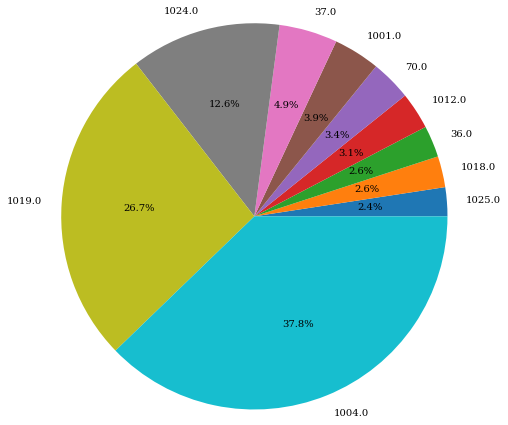

In [7]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.pie(vesselTypeOccurences.iloc[-10:].get_values() \
        ,labels=vesselTypeOccurences.iloc[-10:].index \
        ,radius=2 \
        ,autopct='%1.1f%%')
plt.savefig('TypePie.png')
plt.savefig('TypePie.eps')